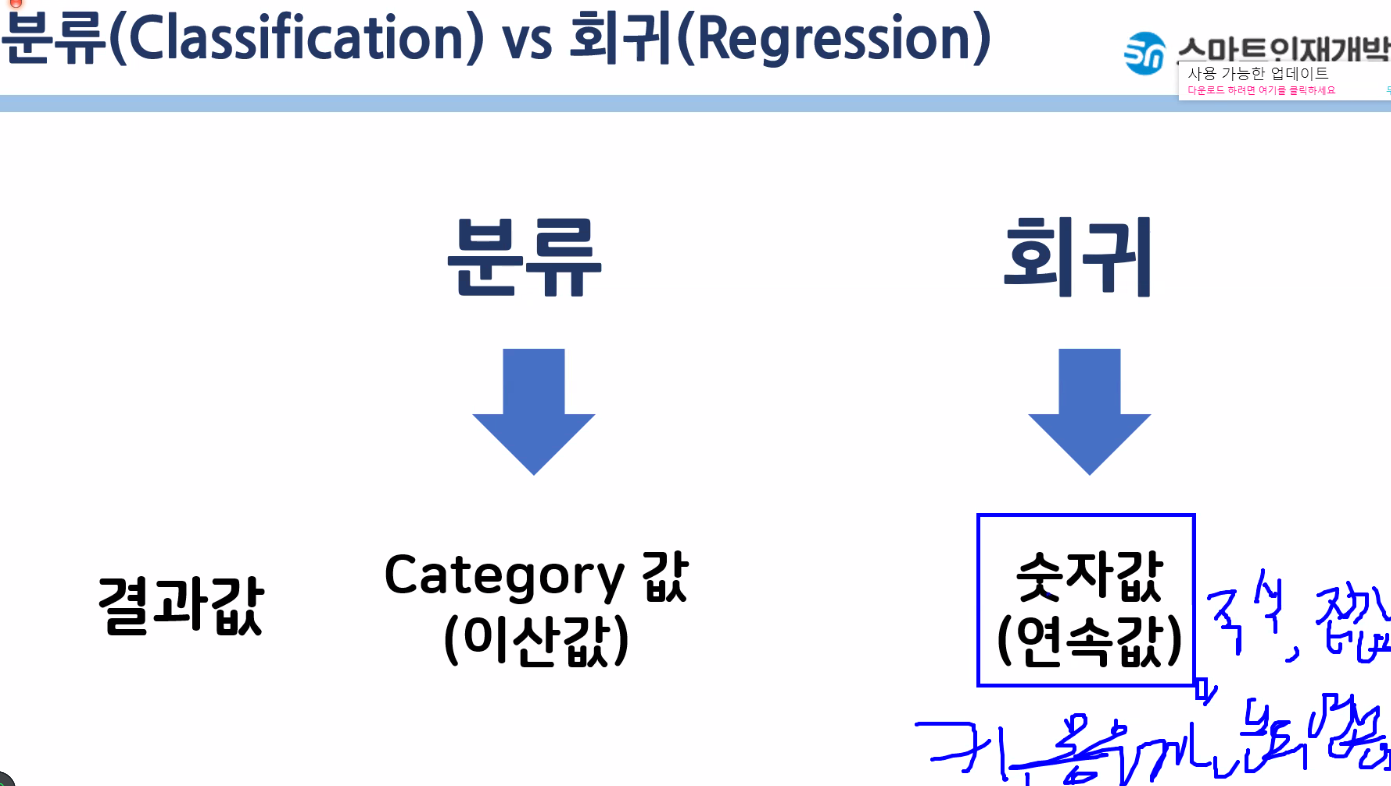
- 분류 : 생존or사망, 꽃잎의 종류, 시험의 합격 등등 몇개의 데이터 중에 예측
- 회귀 : 연속적인 데이터를 예측
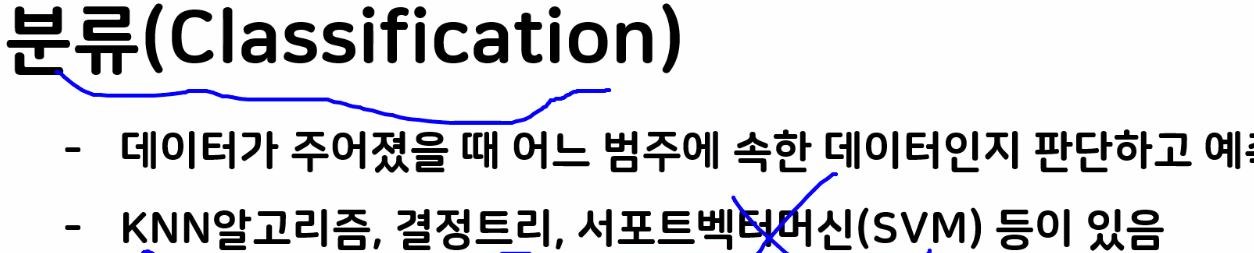
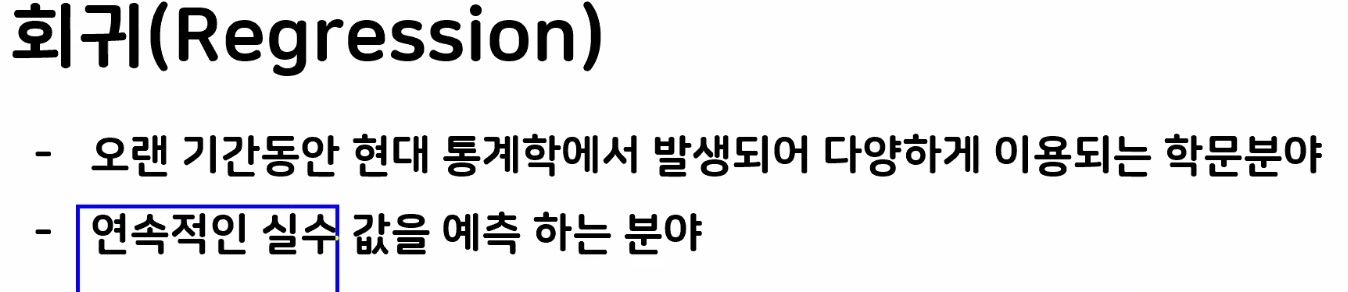
### 선형 회귀
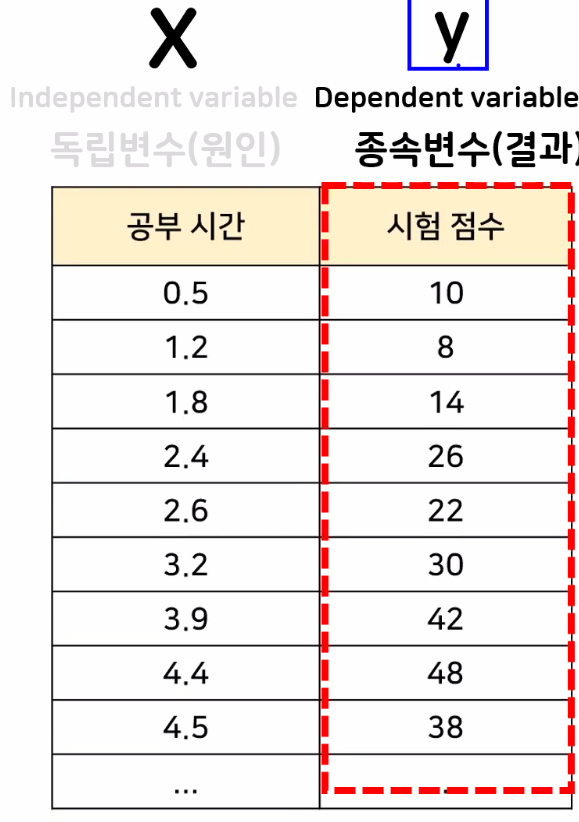
- X에 의해 y에 영향을 받음
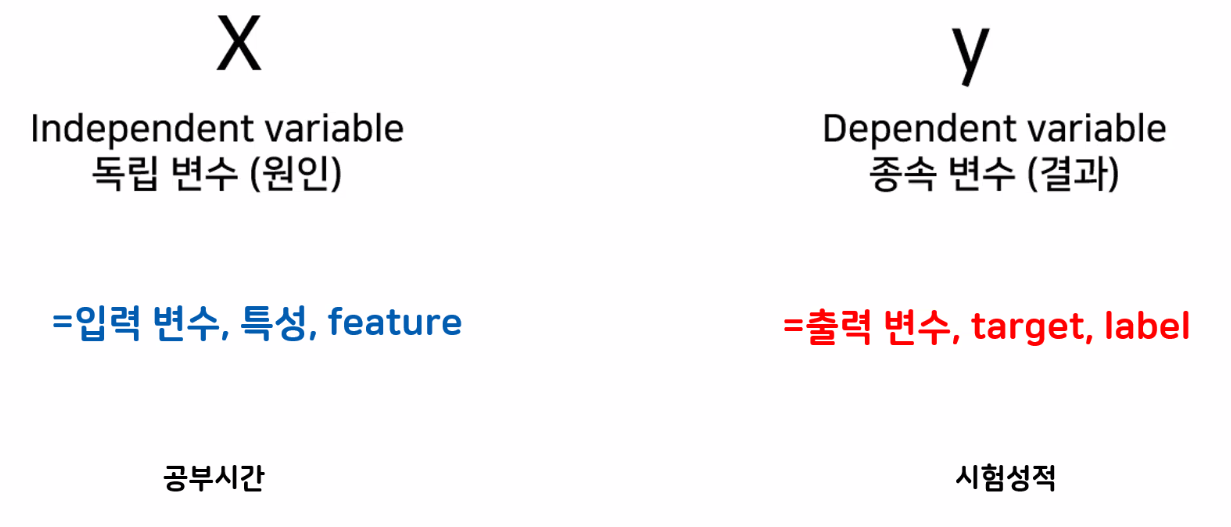
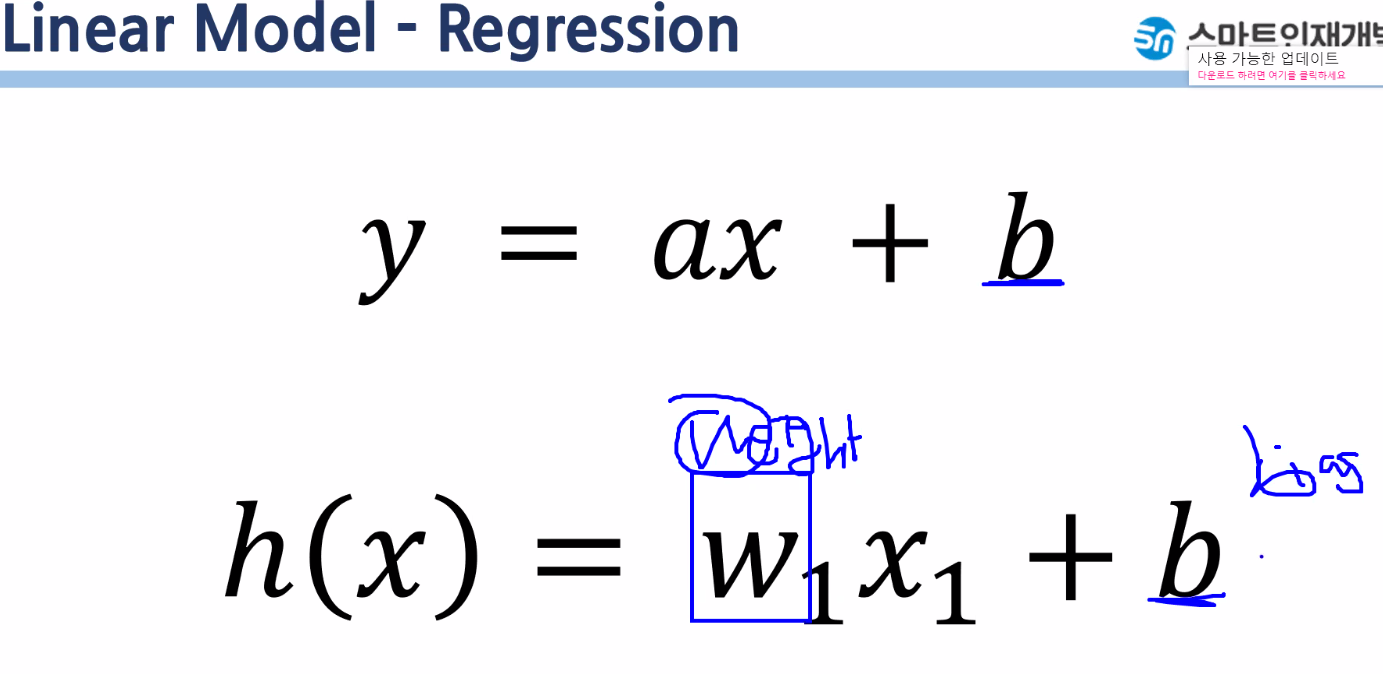
h(x) =가설 함수 , w = weight(가중치) , b = bias (편향)
다양한 요인이 있을때 식이 길어질 수 있음 -> 식을 h(x)로 바꾸어 표현하기 쉽게 하기 위해 바꿈
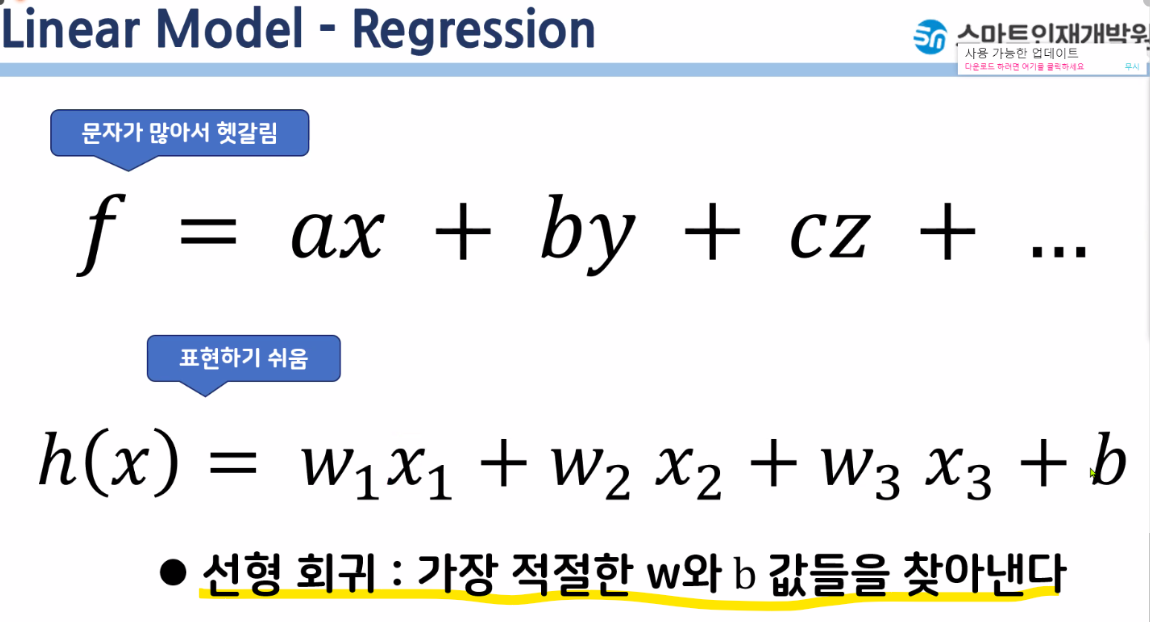
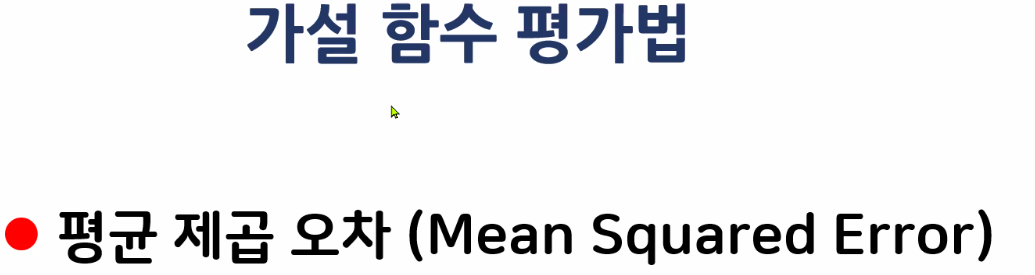
평균 제곱 오차 = MSE
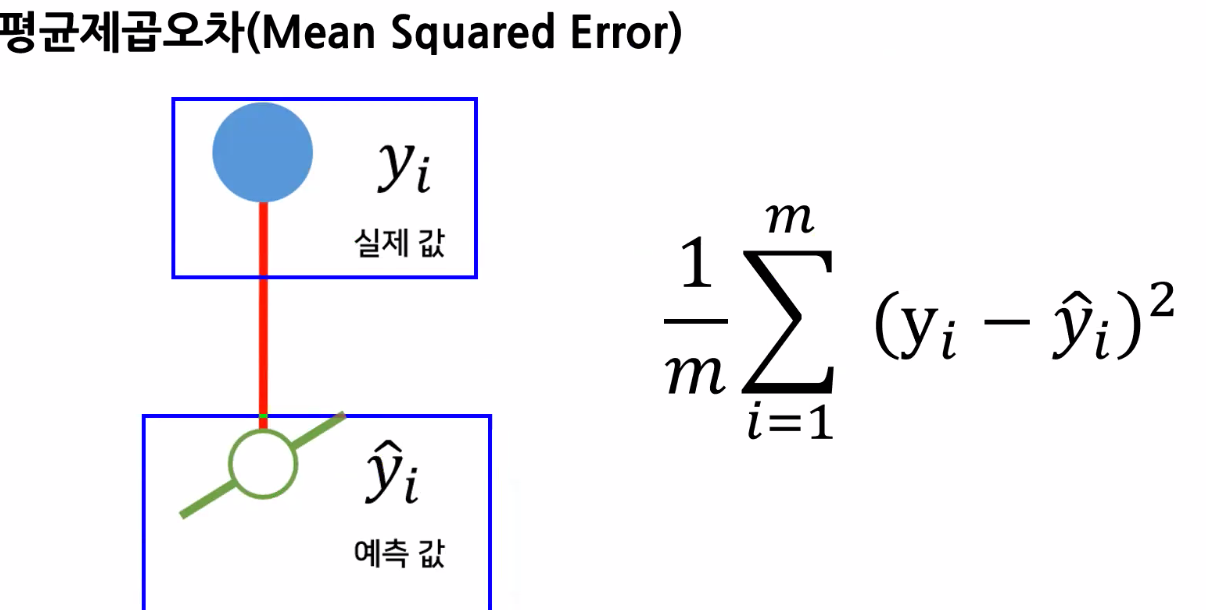
^ -> hat 예측값 / 오차^2 제곱하는 이유 : 음수 값도 잘 볼 수 있고, 범위를 넓혀서 더 잘 볼 수 있음


## Linear Regression

### 공부시간에 따른 시험 점수 예측

In [40]:
# 라이브러리 로딩
import pandas as pd # 판다스
import matplotlib.pyplot as plt # 그래프
# 글꼴 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

from sklearn.linear_model import LinearRegression # 선형 모델
from sklearn.metrics import mean_squared_error  # 평가방법 - 평균제곱오차(MSE)

In [41]:
# 데이터 불러오기
data = pd.read_csv('LinearRegressionData.csv')
data

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [42]:
# 데이터 모양 확인하기
data.shape

(20, 2)

In [43]:
# 문제와 답 데이터로 분리
# X = data.iloc[ : , 0] # 1 차원 데이터
y = data.iloc[ : , 1] # 1 차원 데이터

In [44]:
# 문제는 2차원 데이터로 추출해야함
X = data.iloc[ : , [0]] # 방법1 ) 2 차원 데이터
X = data.iloc[ : , :-1] # 방법2) 2 차원 데이터

In [45]:
# 선형회귀 모델 생성
lr = LinearRegression()

In [46]:
# 학습
lr.fit(X,y)

LinearRegression()

In [47]:
# 예측(X 값으로 예측)
pre = lr.predict(X)
pre

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

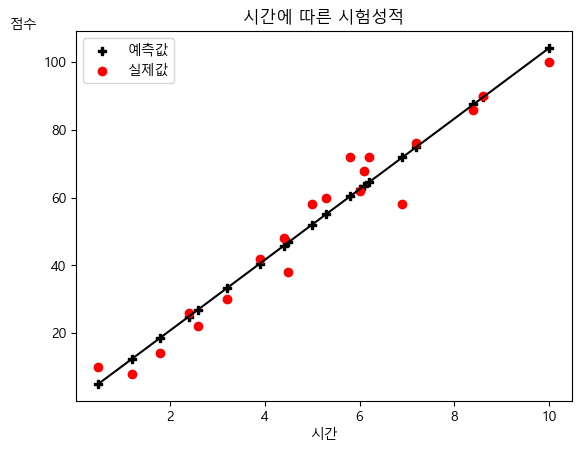

In [48]:
# 선형회귀 시각화
# 데이터를 산점도 그래프로 나타내기
plt.scatter(X,pre, label = "예측값", color = 'black', marker='P')
plt.scatter(X,y, label = "실제값", color = 'red')

# 우리가 예측한 답(pre) 을 가지고 선그래프 
plt.plot(X,pre, color='black')

# 차트 제목 = 시간에 따른 시험성적
plt.title("시간에 따른 시험성적")
plt.xlabel("시간")
plt.ylabel("점수", rotation=0, loc='top')
plt.legend()
plt.show()

In [49]:
# 9시간 공부했을때 모델이 예측하는 예상 점수

#  중요!! -> 문제데이터를 넣을때는 "2차원"으로 넣어줘야함 -> 9 (1차원) -> [[9]] (2차원)
lr.predict([[9]])
print(lr.predict([[9]]))

[93.77478776]


C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [67]:
# 평균제곱오차(MSE) 출력하기 -> mean_squared_error(실제값, 예측값)
mean_squared_error(y,pre) # 실제데이터와 예측데이터를 뺀다음 제곱해서 평균 낸 값 = MSE

139.1974085238573

In [69]:
# 평균제곱근오차(RMSE) -> root_mean_squeared_error
mse = mean_squared_error(y,pre)
rsme = mse ** 0.5 # 제곱근 mse^1/2
rsme

11.798195138403894

In [51]:
# h(x) = wx + b

# W 구하는법
# w = 가중치(weight) / 선형계수 알아보기
# 모델명.coef_
lr.coef_ # w 값

array([10.44369694])

In [52]:
# b 구하는법
# b = 편향(bias)
# 모델명.intercept_
lr.intercept_ # b 값

-0.21848470286721522

h(x) = 10.4436*x -0.2184

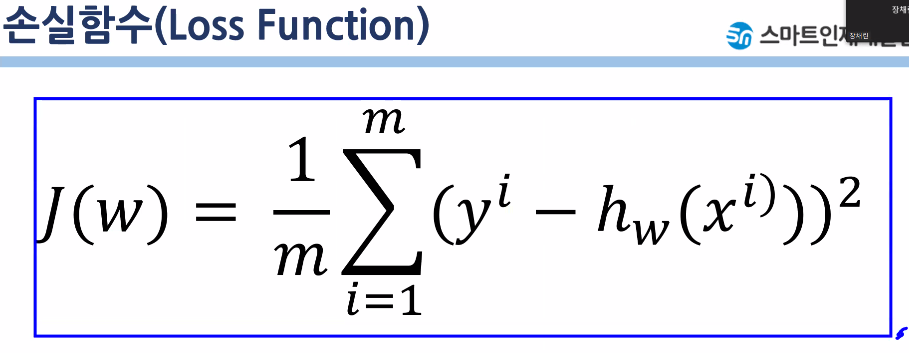
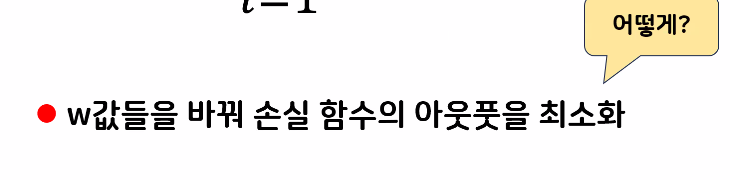
w를 input으로 해서 손실함수를 최소화하는 방법
- 임의의 w를 잡고나서 -> 미분 -> w값에 따른 기울기값을 얻을 수 있음 -> 기울기 값이 클때는 J(w)-가 커서 가설함수가 안좋음
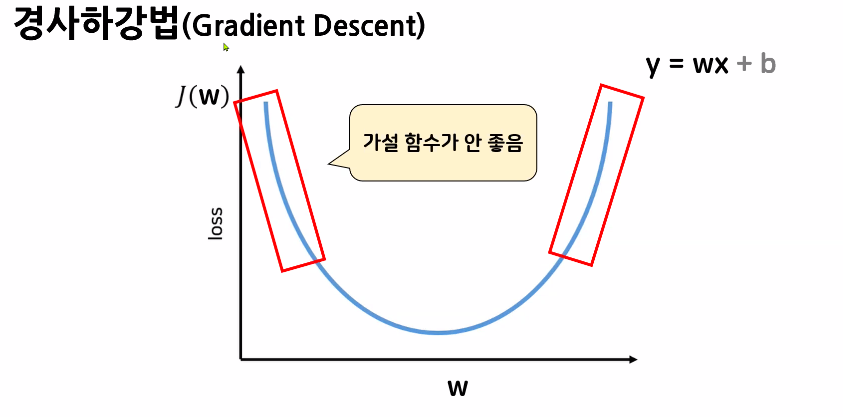
- `극소점`일때 가장 손실함수가 작아서 가설함수가 좋음
- 기울기가 최소(0)이 되는 점으로 가는게 최적의 가설함수를 찾는 방법
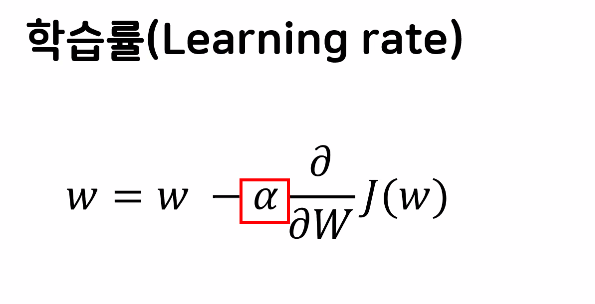
학습률 = 얼마나 보폭을 넓게 할지  

학습률은 하이퍼 파라미터(사용자에 맞춰서 튜닝하는 파라미터값)  

학습률이 큰 경우 - 최적점을 못찾음  (손실이 엄청 커져버리는 발산이 될 수 있음)

학습률이 작은 경우 - 언덕에 걸쳐버림 , 학습하는 시간이 너무 오래걸림


### 경사하강법
- 가중치(w)의 변화에 따른 비용함수/손실함수 값의 변화를 그래프로 나타냄

h(x) = w*x + b

In [53]:
def h(w,x) : # 가설함수 , # b는 0으로 생각하고 진행
    return w * x + 0

### 손실함수/ 비용함수 ( loss function / cost function )
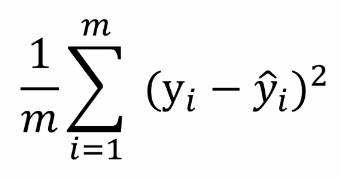
y hat -> y_pre(예측값) 로 사용

In [54]:
# target - y(실제 값) / data - x / h(x) - y hat (예측값)
# (target - y_pre) = 오차
def cost(data, target, weight) :
    y_pre = h(weight, data) # 예측값 : h(weight, data) -> y hat = y_pre
    return ((target - y_pre)**2).mean() # X^2 => X**2 / 1/m 시그마 -> 평균 = .mean()

In [55]:
# 중요 )
# X - Dataframe형태 (2차원) 이고 y는 Series 형태(1차원) 이니까
# 자료형을 맞춰 줘야함

X['hour'] # 'hour' 컬럼만 뽑아내서 1차원으로 인덱싱

cost(X['hour'], y, 10)

38.7

In [56]:
cost(X['hour'], y, 11)

44.40300000000001

In [57]:
cost(X['hour'], y, 9)

95.48300000000002

In [58]:
# weight 값의 범위 설정
weight_arr = range(-10,31)

In [59]:
cost_list = [] # cost 값을 계산할 때마다 리스트에 넣어줌
for w in weight_arr :
    # w에 따른 cost값 계산해서 cost_list 리스트에 값 담아주기
    cost_list.append(cost(X['hour'], y, w))
cost_list

[13046.7,
 11802.682999999999,
 10621.152,
 9502.107,
 8445.548,
 7451.475,
 6519.888000000001,
 5650.787,
 4844.172,
 4100.043,
 3418.4,
 2799.243,
 2242.572,
 1748.387,
 1316.6879999999999,
 947.475,
 640.7480000000002,
 396.507,
 214.75200000000004,
 95.48300000000002,
 38.7,
 44.40300000000001,
 112.59200000000006,
 243.267,
 436.42800000000005,
 692.075,
 1010.208,
 1390.827,
 1833.932,
 2339.523,
 2907.6,
 3538.1630000000005,
 4231.212,
 4986.747,
 5804.768,
 6685.275,
 7628.267999999999,
 8633.747,
 9701.712,
 10832.163,
 12025.1]

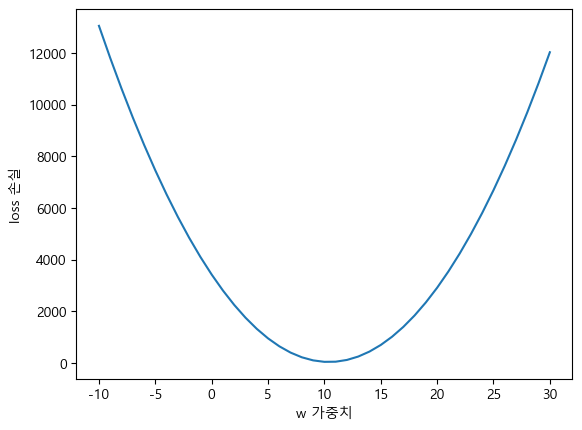

In [60]:
plt.rcParams['axes.unicode_minus'] = False # 그래프에서 '-' 기호가 깨지지 않도록 설정
# 혹은 굴림체로 바꾸면 '-' 안깨짐
plt.plot(weight_arr, cost_list)
plt.xlabel('w 가중치')
plt.ylabel('loss 손실')
plt.show()

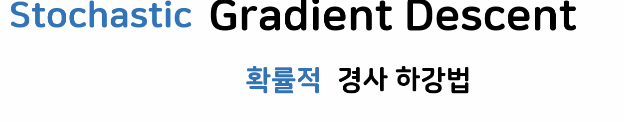
경사하강법 - 시간이 오래걸림 - > `확률적 경사 하강법`
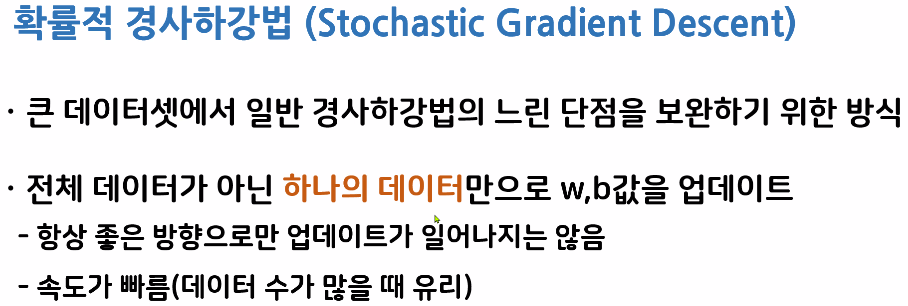
경사하강법 - `전체 데이터` 사용  
확률적 경사하강법 - `하나의 데이터`만 사용
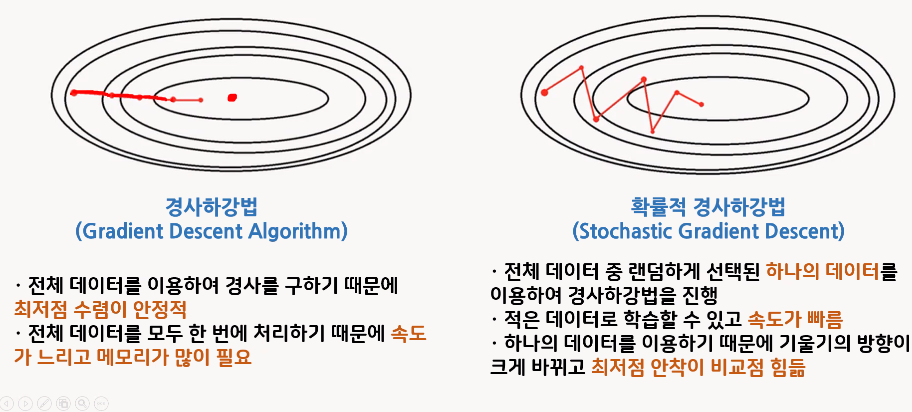

- 확률적 경사 하강법 SGD Regressor 사용하기
    - 전체 데이터 중 랜덤한 하나의 데이터를 이용하여 경사 하강법을 진행
    - 적은 데이터로 학습할 수 있기 때문에 속도가 빠름
    

In [61]:
# 라이브러리 불러오기
from sklearn.linear_model import SGDRegressor

In [75]:
# 모델생성        #max_iter = 가중치 업데이트 반복횟수
sgd_model = SGDRegressor(max_iter=5000,  # 임의의 w(가중치)를 정한다음 몇번을 조정을 해줄건지 
                        eta0 = 0.1,         # eta0 = 학습률(알파, learning rate)
                        verbose = 1)      # 학습 과정을 확인해볼 수 있다.



In [76]:
# 학습
sgd_model.fit(X,y)
# Epoch = 학습한 횟수 -> 최적점에 도달할 때까지 학습시도
# loss = 손실함수 -> 줄어들다가 다시 늘어남 (확률적 경사하강법이라서)
# Norm = w (가중치)

-- Epoch 1
Norm: 9.66, NNZs: 1, Bias: -0.433299, T: 20, Avg. loss: 4014.667513
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 10.89, NNZs: 1, Bias: 3.421390, T: 40, Avg. loss: 236.677690
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 8.39, NNZs: 1, Bias: 2.610753, T: 60, Avg. loss: 51.392439
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.89, NNZs: 1, Bias: 2.899684, T: 80, Avg. loss: 78.850916
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 8.95, NNZs: 1, Bias: 2.109087, T: 100, Avg. loss: 43.498468
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 10.25, NNZs: 1, Bias: 2.575762, T: 120, Avg. loss: 43.592433
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.72, NNZs: 1, Bias: 3.093263, T: 140, Avg. loss: 71.845021
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.04, NNZs: 1, Bias: 2.333886, T: 160, Avg. loss: 38.240259
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 7.55, NNZs: 1, Bias: 1.559876, T: 180, Avg. loss: 39.677047
Total training time: 0.

SGDRegressor(eta0=0.1, max_iter=5000, verbose=1)

In [77]:
# 예측
pre = sgd_model.predict(X)
pre

array([  6.61066985,  13.7283712 ,  19.82925808,  25.93014495,
        27.96377391,  34.06466078,  41.18236214,  46.26643453,
        47.28324901,  52.36732141,  55.41776485,  60.50183724,
        62.5354662 ,  63.55228068,  64.56909516,  71.68679651,
        74.73723995,  86.9390137 ,  88.97264266, 103.20804536])

In [78]:
# w 값 확인 -> 모델명.coef_ 메소드 사용
sgd_model.coef_

array([10.16814479])

In [79]:
# b 값 확인 -> 모델명.intercept_ 메소드 사용
sgd_model.intercept_

array([1.52659745])

알아낸 가설함수  
h(x) = 10.23 * x + 1.07

# 다항회귀 (Polynomial Regression)

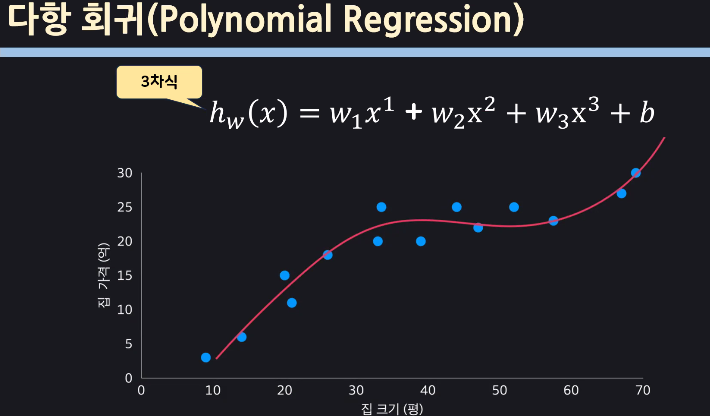
2차식 이상
`선형회귀 : 적절한 w,b를 찾는다`  
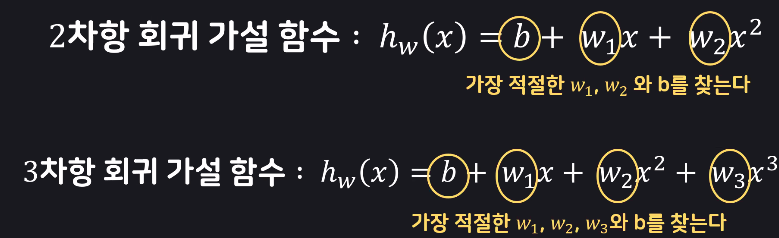
선형 회귀 -> 다항 회귀 하는법  
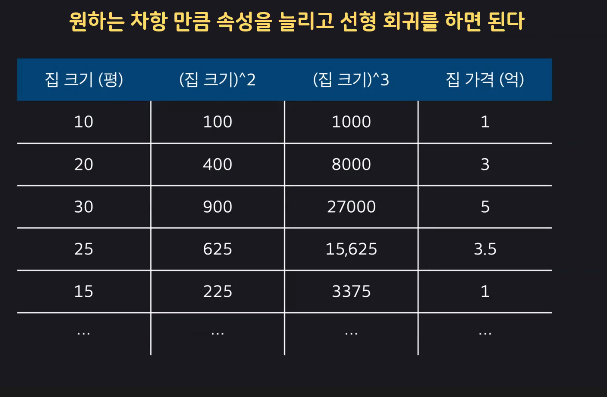